<a href="https://colab.research.google.com/github/elewin2022/Data_Sci/blob/main/Copy_of_Final_Linear_Image_Model_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
#labels used to train this particular model, alexnet (pretrained - means already good at this task)
model = alexnet(weights='DEFAULT').to(device) #tested that ex. sailboat or not for weeks, for each image we are going to get a thousand numbers
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1xl7kwA5owLUYKvmWZYHGLCS_bIypDr8-JaDmnYE62QY/edit#slide=id.g17f45e72e1c_0_21" #copy own datadeck link

In [ ]:
url

'https://docs.google.com/presentation/d/1xl7kwA5owLUYKvmWZYHGLCS_bIypDr8-JaDmnYE62QY/edit#slide=id.g17f45e72e1c_0_21'

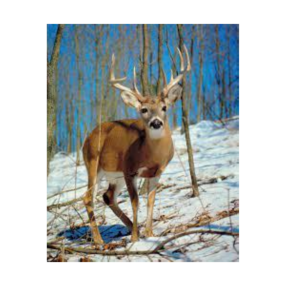

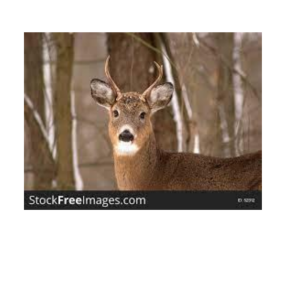

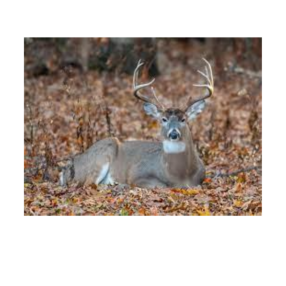

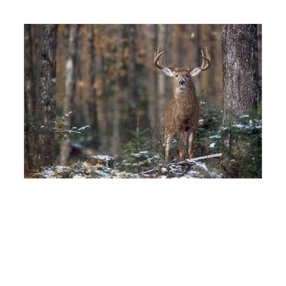

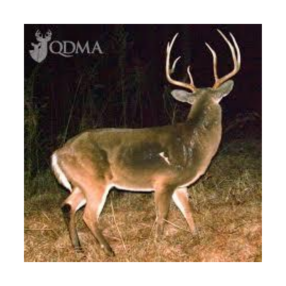

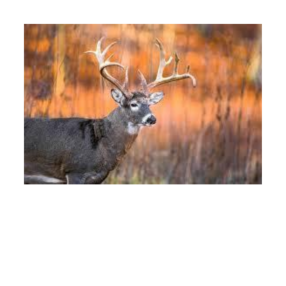

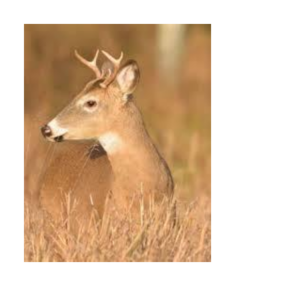

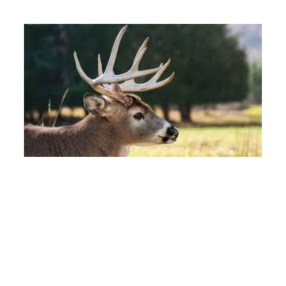

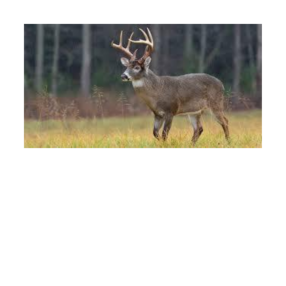

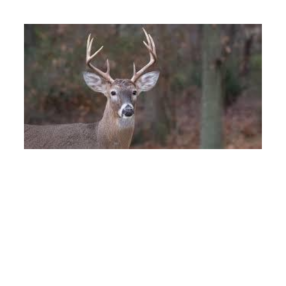

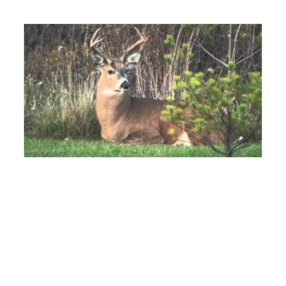

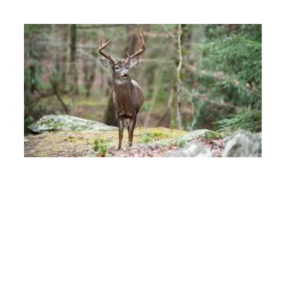

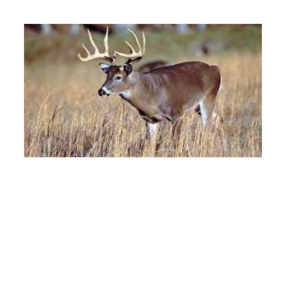

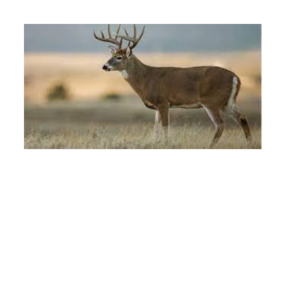

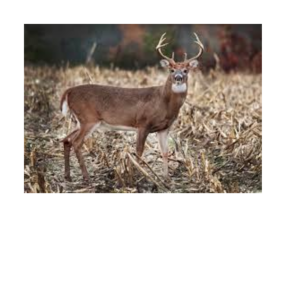

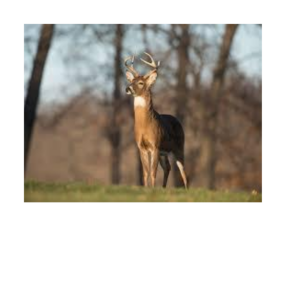

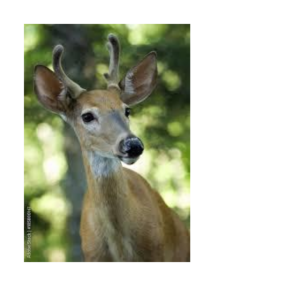

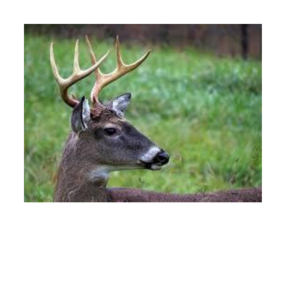

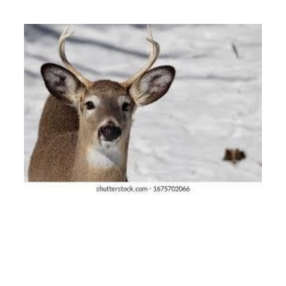

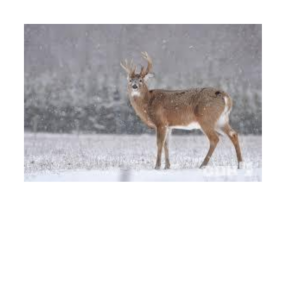

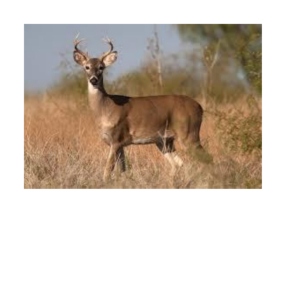

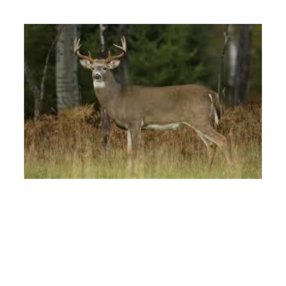

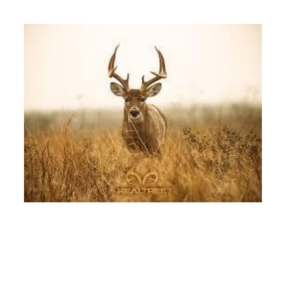

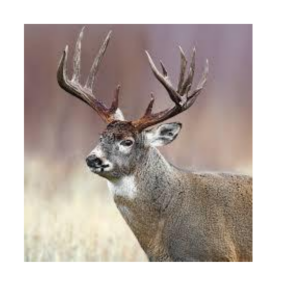

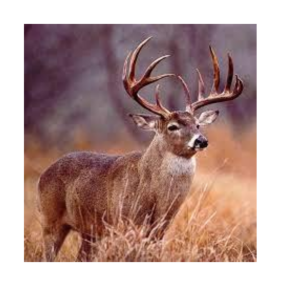

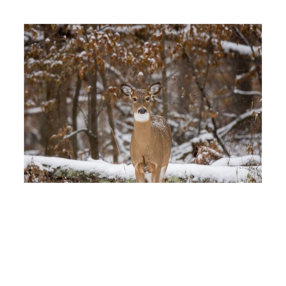

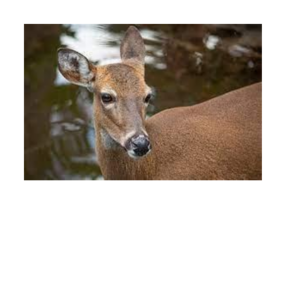

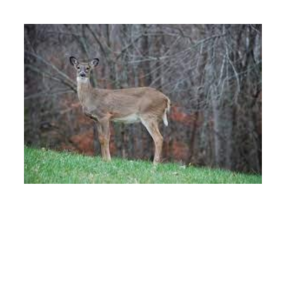

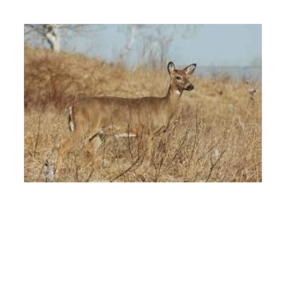

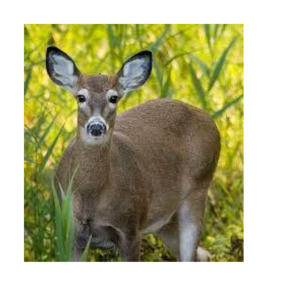

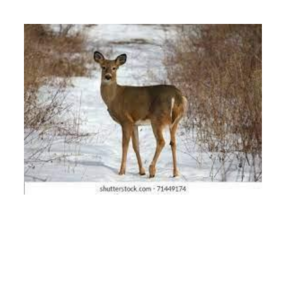

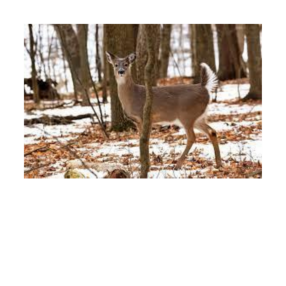

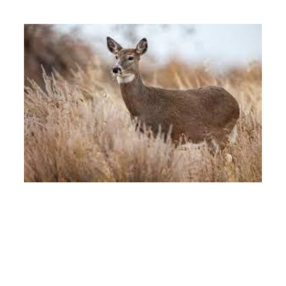

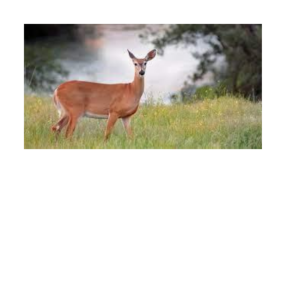

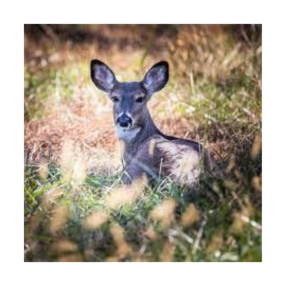

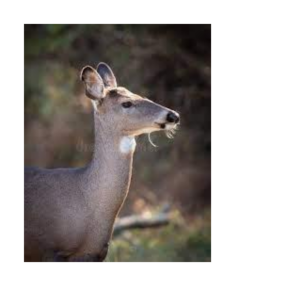

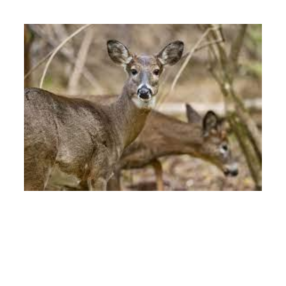

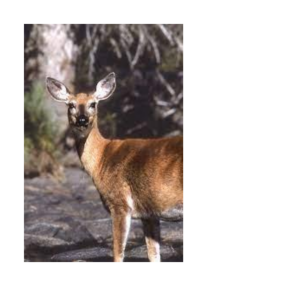

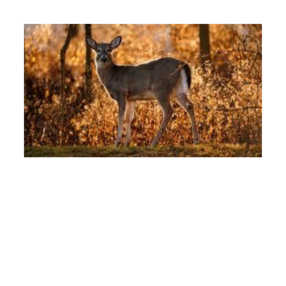

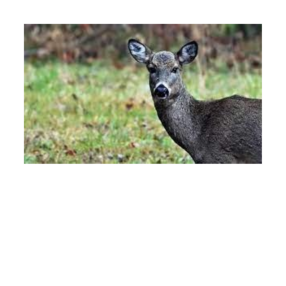

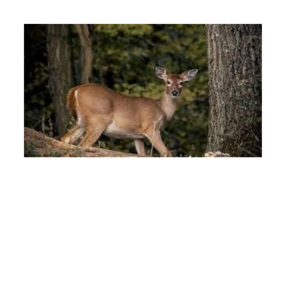

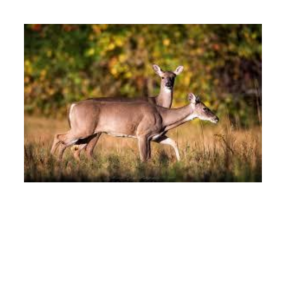

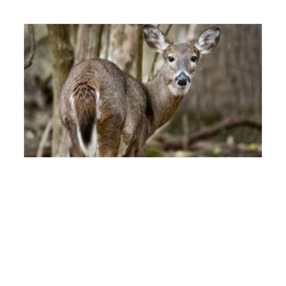

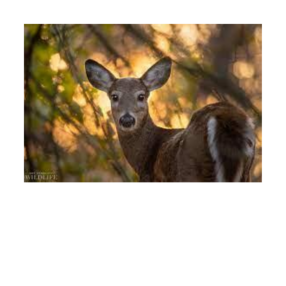

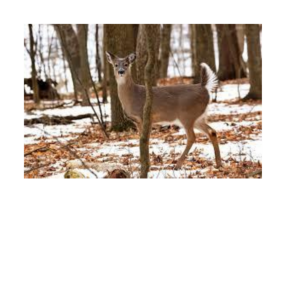

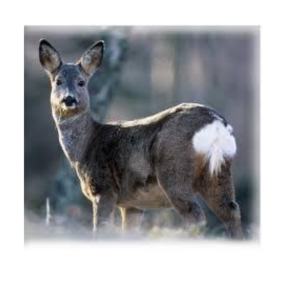

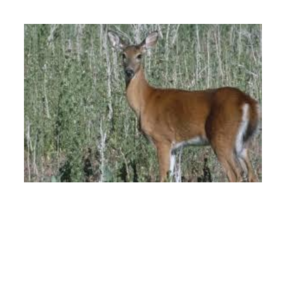

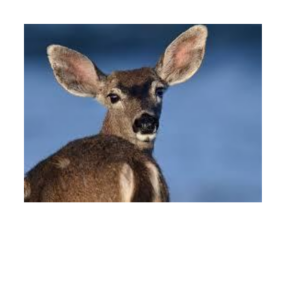

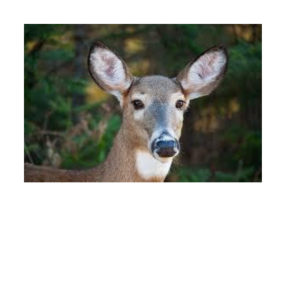

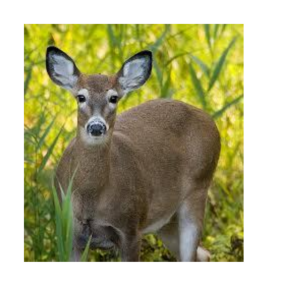

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape #get to see how many images we brought in. 3 color channels

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) #going to take stack of images and run it through the model

tensor([[-2.5626, -1.0247, -1.5560,  ..., -3.1554,  1.6283, -0.7630],
        [-4.8487, -3.5533, -3.2244,  ..., -3.8345,  3.4652,  0.0743],
        [ 0.6517, -2.1503, -1.8745,  ...,  1.4797,  1.6301, -1.1223],
        ...,
        [-0.4667, -3.2869, -0.5509,  ..., -3.6865,  3.0089,  1.8529],
        [-2.0243, -3.4570, -0.7289,  ..., -3.2249,  4.4341,  1.1031],
        [-0.9818, -3.8633,  0.8456,  ..., -2.5172,  5.6717,  2.4241]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

redbone
wall clock
weasel
coyote, prairie wolf, brush wolf, Canis latrans
gazelle
cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
kit fox, Vulpes macrotis
hare
coyote, prairie wolf, brush wolf, Canis latrans
hare
malinois
wood rabbit, cottontail, cottontail rabbit
impala, Aepyceros melampus
hartebeest
German short-haired pointer
Great Dane
ibex, Capra ibex
timber wolf, grey wolf, gray wolf, Canis lupus
bucket, pail
coyote, prairie wolf, brush wolf, Canis latrans
lion, king of beasts, Panthera leo
coyote, prairie wolf, brush wolf, Canis latrans
hare
grey fox, gray fox, Urocyon cinereoargenteus
gazelle
coyote, prairie wolf, brush wolf, Canis latrans
ibex, Capra ibex
coyote, prairie wolf, brush wolf, Canis latrans
cheetah, chetah, Acinonyx jubatus
ibex, Capra ibex
coyote, prairie wolf, brush wolf, Canis latrans
ibex, Capra ibex
bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis
sorrel
cougar, puma, catamount, mountain l

In [ ]:
Y = np.zeros(50,) #answer key
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #answer key, dog dog dog dog dog... cat cat cat cat cat....

In [ ]:
X.shape #50 images in our dataset and there are a 1000 numbers in those feature vectors

(50, 1000)

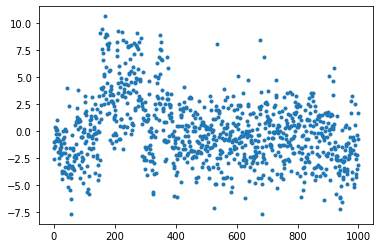

In [ ]:
plt.plot(X[0],'.') #argument max (argmax) - tallest one, ex. X[0] is the very first dog picture #these are the outputs of each of it's thousand categories 

In [ ]:
np.argmax(X[0])

168

In [ ]:
labels [978]

'seashore, coast, seacoast, sea-coast'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

(array([ 13.,  60., 172., 250., 223., 155.,  64.,  25.,  29.,   9.]),
 array([-7.6988773, -5.8642554, -4.0296335, -2.1950116, -0.3603897,
         1.4742322,  3.308854 ,  5.143476 ,  6.978098 ,  8.812719 ,
        10.647342 ], dtype=float32),
 <a list of 10 Patch objects>)

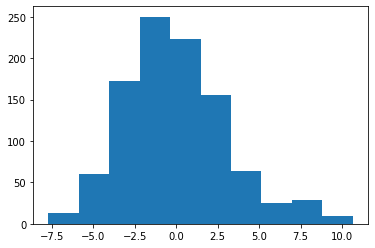

In [ ]:
plt.hist(X[0]) #histogram of values in the image

In [ ]:
X = GPU_data(X) #load in model, y = mx+b
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): #load in model y=mx+b, w is m just upside down

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #start with weights and biases and name run, making small approaches towards the target instead of backtracking like in mini golf
c = wb.config

c.h = 0.001 #take 32 images at a time and try to classify them with one hundred thousand steps, used alexnet as a pretrained app that turned it into a list of feature now take features and turn it into a category (cat or dog)
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train') #get batch of data, give us 32 cats and dogs mixed up with answer key

    loss = cross_entropy(softmax(model(x,w)),y) #throw that through the model and then optimize that thing, softmax to scale it and entropy to tell us how wrong

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #trying to make loss as small as possible 
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


KeyboardInterrupt: ignored

In [ ]:
#run it, authorize it, and watch it improve as it experiences more of the data

In [ ]:
#before then, copy images over into datadeck (both on github), delete cats and dogs, put first 25 of one thing then other thing, run the notebook and see what it says

#Final

In [ ]:
#Best: 0.812, Worst: 0.6825, Average: 0.7588

In [ ]:
#successfully ran and reported three times 